In [1]:
import os


n_objectives = 3

os.environ["DEEPHYPER_BENCHMARK_DTLZ_PROB"] = str(2)
os.environ["DEEPHYPER_BENCHMARK_NDIMS"] = str(8)
os.environ["DEEPHYPER_BENCHMARK_NOBJS"] = str(n_objectives)
os.environ["DEEPHYPER_BENCHMARK_DTLZ_OFFSET"] = str(0.6)

In [2]:
import deephyper_benchmark as dhb
dhb.load("DTLZ")
from deephyper_benchmark.lib.dtlz import hpo, metrics

## Scalarization and Pareto front

In [3]:
from deephyper.evaluator import Evaluator
from deephyper.evaluator.callback import TqdmCallback
from deephyper.search.hps import CBO


max_evals = 1_000
random_state = 42

search_params = dict(
    acq_func="UCB",
    scheduler=dict(
        type="periodic-exp-decay",
        periode=50,
        rate=0.25,
    ),
    # important setting for continuous inpout/output problems
    objective_scaler="minmaxlog",
    update_prior=True,
    update_prior_quantile=0.25,
    random_state=random_state,
    # speed up computation
    filter_duplicated=False,
    filter_failures="ignore",
    n_jobs=6,
    verbose=1,
)

evaluator_params = dict(
    method="serial", method_kwargs={"num_workers": 1, "callbacks": [TqdmCallback()]}
)

In [4]:
# %%prun -s cumulative -q -l 50 -T prun0

results_linear = CBO(
    hpo.problem,
    Evaluator.create(
        hpo.run,
        **evaluator_params,
    ),
    **search_params,
    # scalarization
    moo_scalarization_strategy="rLinear",
    log_dir="output/dtlz/ii/linear",
).search(max_evals=max_evals)

results_linear

/Users/romainegele/Documents/Argonne/deephyper/deephyper/evaluator/_evaluator.py:126: UserWarning: Applying nest-asyncio patch for IPython Shell!
  warnings.warn(


  0%|          | 0/1000 [00:00<?, ?it/s]

,p:x0,p:x1,p:x2,p:x3,p:x4,p:x5,p:x6,p:x7,objective_0,objective_1,objective_2,job_id,m:timestamp_submit,m:timestamp_gather,m:timestamp_start,m:timestamp_end
0,0.410104,0.837388,0.444833,0.812396,0.799553,0.734028,0.617079,0.543403,-2.283825e-01,-0.874580,-0.678904,0,0.030898,0.033626,1.687441e+09,1.687441e+09
1,0.955478,0.003630,0.879136,0.881478,0.527110,0.637034,0.583369,0.515832,-8.183927e-02,-0.000467,-1.168329,1,0.056628,0.056864,1.687441e+09,1.687441e+09
2,0.692110,0.288138,0.397786,0.097835,0.449584,0.330617,0.789312,0.927573,-6.403943e-01,-0.311407,-1.355763,2,0.065352,0.065721,1.687441e+09,1.687441e+09
3,0.330430,0.830332,0.661774,0.354294,0.651320,0.425147,0.538546,0.131278,-3.020604e-01,-1.106417,-0.655213,3,0.074158,0.074364,1.687441e+09,1.687441e+09
4,0.536501,0.326307,0.536557,0.433098,0.851949,0.709191,0.938640,0.216796,-7.937864e-01,-0.446685,-1.021764,4,0.081990,0.082258,1.687441e+09,1.687441e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.000000,0.664760,0.638393,0.601845,0.616915,0.572353,0.605675,-1.006754e+00,-0.000000,-0.000000,995,44.658304,44.658469,1.687441e+09,1.687441e+09
996,0.000000,0.000000,0.592697,0.602385,0.734434,0.619151,0.584608,0.602527,-1.018742e+00,-0.000000,-0.000000,996,44.706625,44.706865,1.687441e+09,1.687441e+09
997,0.000000,1.000000,0.622297,0.561473,0.611564,0.595069,0.614867,0.634341,-6.144909e-17,-1.003540,-0.000000,997,44.755215,44.755375,1.687441e+09,1.687441e+09
998,0.000000,1.000000,0.629114,0.626716,0.600222,0.617275,0.590295,0.612526,-6.136160e-17,-1.002111,-0.000000,998,44.804289,44.804455,1.687441e+09,1.687441e+09


In [5]:
# with open("prun0", "r") as f:
#     print(f.read())

In [6]:
# %%prun -s cumulative -q -l 50 -T prun0

results_chebyshev = CBO(
    hpo.problem,
    Evaluator.create(
        hpo.run,
        **evaluator_params,
    ),
    **search_params,
    # scalarization
    moo_scalarization_strategy="rChebyshev",
    log_dir="output/dtlz/ii/chebyshev",
).search(max_evals=max_evals)

results_chebyshev

  0%|          | 0/1000 [00:00<?, ?it/s]

,p:x0,p:x1,p:x2,p:x3,p:x4,p:x5,p:x6,p:x7,objective_0,objective_1,objective_2,job_id,m:timestamp_submit,m:timestamp_gather,m:timestamp_start,m:timestamp_end
0,0.410104,0.837388,0.444833,0.812396,0.799553,0.734028,0.617079,0.543403,-2.283825e-01,-0.874580,-0.678904,0,0.020251,0.020536,1.687441e+09,1.687441e+09
1,0.955478,0.003630,0.879136,0.881478,0.527110,0.637034,0.583369,0.515832,-8.183927e-02,-0.000467,-1.168329,1,0.033632,0.033797,1.687441e+09,1.687441e+09
2,0.692110,0.288138,0.397786,0.097835,0.449584,0.330617,0.789312,0.927573,-6.403943e-01,-0.311407,-1.355763,2,0.043077,0.043234,1.687441e+09,1.687441e+09
3,0.330430,0.830332,0.661774,0.354294,0.651320,0.425147,0.538546,0.131278,-3.020604e-01,-1.106417,-0.655213,3,0.050430,0.050566,1.687441e+09,1.687441e+09
4,0.536501,0.326307,0.536557,0.433098,0.851949,0.709191,0.938640,0.216796,-7.937864e-01,-0.446685,-1.021764,4,0.060247,0.060426,1.687441e+09,1.687441e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.000000,0.677905,0.731359,0.699133,0.468499,1.000000,0.429517,-1.239508e+00,-0.000000,-0.000000,995,51.935391,51.935541,1.687441e+09,1.687441e+09
996,0.000000,0.000000,0.709282,0.628515,0.619261,0.530418,0.284835,0.434259,-1.144767e+00,-0.000000,-0.000000,996,51.987567,51.987725,1.687441e+09,1.687441e+09
997,0.000757,1.000000,0.635816,0.478952,0.540779,0.640247,0.635050,0.539471,-6.282156e-17,-1.025954,-0.001221,997,52.040188,52.040391,1.687441e+09,1.687441e+09
998,0.393728,0.902027,0.565752,0.930100,0.597680,0.524390,0.506422,0.641052,-1.406701e-01,-0.906831,-0.653016,998,52.093487,52.093663,1.687441e+09,1.687441e+09


In [7]:
# %%prun -s cumulative -q -l 50 -T prun0

results_random = CBO(
    hpo.problem,
    Evaluator.create(
        hpo.run,
        **evaluator_params,
    ),
    **search_params,
    # scalarization
    moo_scalarization_strategy="random",
    log_dir="output/dtlz/ii/random",
).search(max_evals=max_evals)

results_random

  0%|          | 0/1000 [00:00<?, ?it/s]

,p:x0,p:x1,p:x2,p:x3,p:x4,p:x5,p:x6,p:x7,objective_0,objective_1,objective_2,job_id,m:timestamp_submit,m:timestamp_gather,m:timestamp_start,m:timestamp_end
0,0.410104,0.837388,0.444833,0.812396,0.799553,0.734028,0.617079,0.543403,-2.283825e-01,-8.745804e-01,-0.678904,0,0.022736,0.023072,1.687441e+09,1.687441e+09
1,0.955478,0.003630,0.879136,0.881478,0.527110,0.637034,0.583369,0.515832,-8.183927e-02,-4.666913e-04,-1.168329,1,0.040334,0.040910,1.687441e+09,1.687441e+09
2,0.692110,0.288138,0.397786,0.097835,0.449584,0.330617,0.789312,0.927573,-6.403943e-01,-3.114072e-01,-1.355763,2,0.055522,0.055832,1.687441e+09,1.687441e+09
3,0.330430,0.830332,0.661774,0.354294,0.651320,0.425147,0.538546,0.131278,-3.020604e-01,-1.106417e+00,-0.655213,3,0.065409,0.065604,1.687441e+09,1.687441e+09
4,0.536501,0.326307,0.536557,0.433098,0.851949,0.709191,0.938640,0.216796,-7.937864e-01,-4.466847e-01,-1.021764,4,0.075310,0.075587,1.687441e+09,1.687441e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.032562,1.000000,0.598394,0.458358,0.469590,0.432357,0.495982,0.654332,-6.598008e-17,-1.077537e+00,-0.055163,995,48.257370,48.257534,1.687441e+09,1.687441e+09
996,0.039119,0.000000,0.658561,0.390026,0.576916,0.592460,0.441040,0.620217,-1.071759e+00,-0.000000e+00,-0.065941,996,48.308792,48.308979,1.687441e+09,1.687441e+09
997,1.000000,0.807519,0.671719,0.579473,0.648532,0.637568,0.915555,0.586021,-2.022197e-17,-6.483237e-17,-1.109102,997,48.359760,48.359963,1.687441e+09,1.687441e+09
998,0.127062,0.545208,1.000000,0.759713,0.644289,0.554857,0.924061,0.564136,-8.321005e-01,-9.595447e-01,-0.256915,998,48.408866,48.409084,1.687441e+09,1.687441e+09


In [8]:
import matplotlib.pyplot as plt


pe = metrics.PerformanceEvaluator()

results = {
    "linear": results_linear,
    "chebyshev": results_chebyshev,
    "random": results_random,
}

summary = {}
for label, res in results.items():
    sol = res[[f"objective_{i}" for i in range(n_objectives)]].values
    hv, rmse = [], []
    for i in range(len(sol)):
        hv.append(pe.hypervolume(sol[:i+1]))
        rmse.append(pe.rmse(sol[:i+1]))

    summary[label] = {
        "hv": hv,
        "rmse": rmse
    }

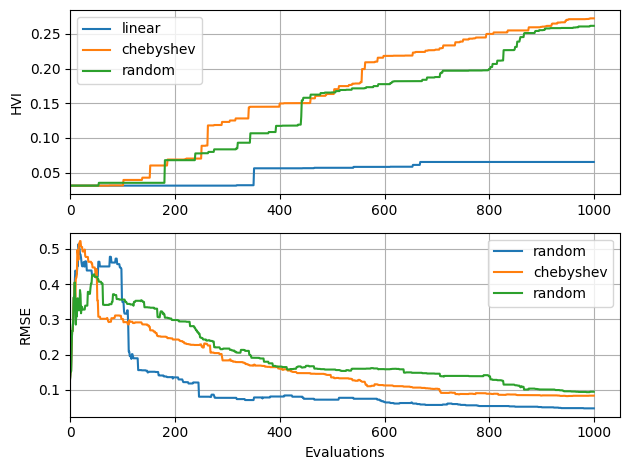

In [9]:

plt.figure()

plt.subplot(2, 1, 1)
plt.plot(summary["linear"]["hv"], label="linear")
plt.plot(summary["chebyshev"]["hv"], label="chebyshev")
plt.plot(summary["random"]["hv"], label="random")
plt.ylabel("HVI")
plt.xlim(0)
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(summary["linear"]["rmse"], label="random")
plt.plot(summary["chebyshev"]["rmse"], label="chebyshev")
plt.plot(summary["random"]["rmse"], label="random")
plt.xlabel("Evaluations")
plt.ylabel("RMSE")
plt.xlim(0)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [10]:
1000 * 0.05

50.0